# Import networkx and matplotlib.pyplot in the project file.

In [59]:
import networkx as nx
import networkx
import matplotlib.pyplot as plt

# Create graph using edgelist from edge_list.txt file

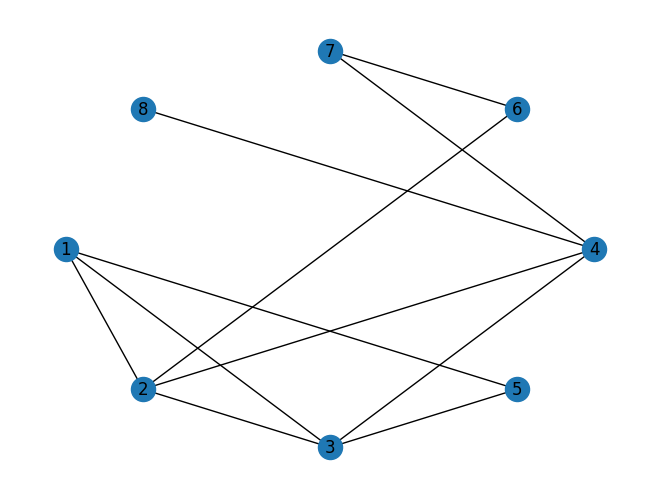

In [60]:
#  Undirected graph
G = nx.read_edgelist('./data/edge_list.txt')
nx.draw(G, pos=nx.shell_layout(G),with_labels = True)
#nx.draw(G, pos=nx.spiral_layout(G),with_labels = True)
# Directed graph
# G = nx.read_edgelist('edge_list.txt', create_using=nx.DiGraph())

# Check edges


In [44]:
G.edges()

EdgeView([('1', '2'), ('1', '3'), ('1', '5'), ('2', '3'), ('2', '4'), ('2', '6'), ('3', '4'), ('3', '5'), ('4', '7'), ('4', '8'), ('6', '7')])

# 1. Degree Centrality

In [45]:
#Check the degree of node 3
G.degree('3')

4

## Histogram degree plot


(array([1., 0., 0., 3., 0., 0., 1., 0., 0., 3.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

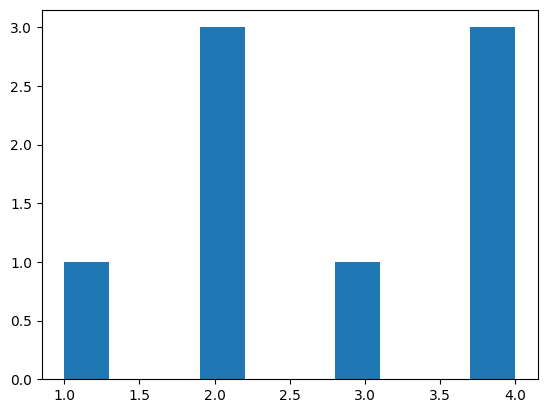

In [46]:
degrees = [G.degree(n) for n in G.nodes()]
plt.hist(degrees)

## Degree sequence 

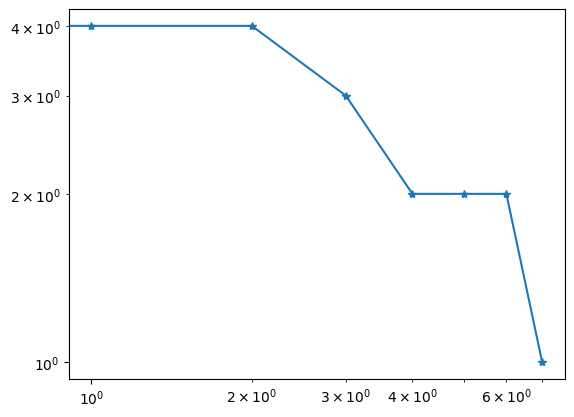

In [47]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
plt.loglog(degree_sequence,marker='*')
plt.show()

## Degree centrality for unweighted graph


In [48]:
degree_centrality = nx.degree_centrality(G)
degree_centrality

{'1': 0.42857142857142855,
 '2': 0.5714285714285714,
 '3': 0.5714285714285714,
 '5': 0.2857142857142857,
 '4': 0.5714285714285714,
 '6': 0.2857142857142857,
 '7': 0.2857142857142857,
 '8': 0.14285714285714285}

## Sort for identifying most inflential nodes using degree centrality


In [49]:
for node in sorted(degree_centrality, key=degree_centrality.get, reverse=True):
  print(node, degree_centrality[node])

2 0.5714285714285714
3 0.5714285714285714
4 0.5714285714285714
1 0.42857142857142855
5 0.2857142857142857
6 0.2857142857142857
7 0.2857142857142857
8 0.14285714285714285


## Calculating degree centrality manually

In [50]:
n_nodes = len(G.nodes)
for node in G.nodes():
  print(node, G.degree(node)/(n_nodes-1))

1 0.42857142857142855
2 0.5714285714285714
3 0.5714285714285714
5 0.2857142857142857
4 0.5714285714285714
6 0.2857142857142857
7 0.2857142857142857
8 0.14285714285714285


# 2. Closeness centrality

In [51]:
#Undirected and unweigted graph
closeness_centrality = nx.closeness_centrality(G)

In [52]:
#Sort for identifying most inflential nodes using closeness_centrality
for node in sorted(closeness_centrality, key=closeness_centrality.get, reverse=True):
  print(node, closeness_centrality[node])

2 0.7
3 0.7
4 0.7
1 0.5384615384615384
6 0.5
7 0.5
5 0.4666666666666667
8 0.4375


# 3. Betweenness centrality

In [53]:
betweenness_centrality = nx.betweenness_centrality(G)


In [54]:
#Sort for identifying most inflential nodes using betweenness_centrality
for node in sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True):
  print(node, betweenness_centrality[node])

4 0.43650793650793646
2 0.26984126984126977
3 0.25396825396825395
1 0.047619047619047616
7 0.047619047619047616
6 0.03968253968253967
5 0.0
8 0.0


# 4. Eigenvector centrality

If a node is pointed to by many nodes then that node will have high eigenvector centrality.

In [55]:
eigenvector_centrality = nx.eigenvector_centrality(G)
#Sort for identifying most inflential nodes using eigenvector centrality
for node in sorted(eigenvector_centrality, key=eigenvector_centrality.get, reverse=True):
  print(node, eigenvector_centrality[node])

3 0.49990444757801505
2 0.4833968920391363
4 0.4147981445720844
1 0.40034446108307287
5 0.2843195456710625
6 0.2155422752851509
7 0.1990773463680826
8 0.13100356283562056


# 5. Katz centrality

In [56]:
kat_centrality = nx.katz_centrality(G)

#Sort for identifying most inflential nodes using kat_centrality
for node in sorted(kat_centrality, key=kat_centrality.get, reverse=True):
  print(node, kat_centrality[node])


3 0.39837116164016045
2 0.3979957464558509
4 0.3912885477686667
1 0.3627994945952694
5 0.3266180854671848
6 0.32248848309558037
7 0.3218787410123867
8 0.28962990709484226


# 6. PageRank centrality

In [57]:
nx.pagerank(G,alpha=0.1)

{'1': 0.12496287977430556,
 '2': 0.12940649323640047,
 '3': 0.12931199779369212,
 '5': 0.11989822771990741,
 '4': 0.13666005208333334,
 '6': 0.12183559027777778,
 '7': 0.12200826551649306,
 '8': 0.11591649359809028}